In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
pip install pandas

In [23]:
pip install --upgrade pip

In [24]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\ML\Training\data.csv")

In [25]:
df.shape

(4600, 18)

In [26]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [27]:
df.nunique

<bound method DataFrame.nunique of                 date         price  bedrooms  bathrooms  sqft_living  \
0      5/2/2014 0:00  3.130000e+05         3       1.50         1340   
1      5/2/2014 0:00  2.384000e+06         5       2.50         3650   
2      5/2/2014 0:00  3.420000e+05         3       2.00         1930   
3      5/2/2014 0:00  4.200000e+05         3       2.25         2000   
4      5/2/2014 0:00  5.500000e+05         4       2.50         1940   
...              ...           ...       ...        ...          ...   
4595   7/9/2014 0:00  3.081667e+05         3       1.75         1510   
4596   7/9/2014 0:00  5.343333e+05         3       2.50         1460   
4597   7/9/2014 0:00  4.169042e+05         3       2.50         3010   
4598  7/10/2014 0:00  2.034000e+05         4       2.00         2090   
4599  7/10/2014 0:00  2.206000e+05         3       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           

In [28]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [29]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [30]:
columns_to_remove = ['date','yr_renovated','street','city','statezip','country']
df=df.drop(columns=columns_to_remove)


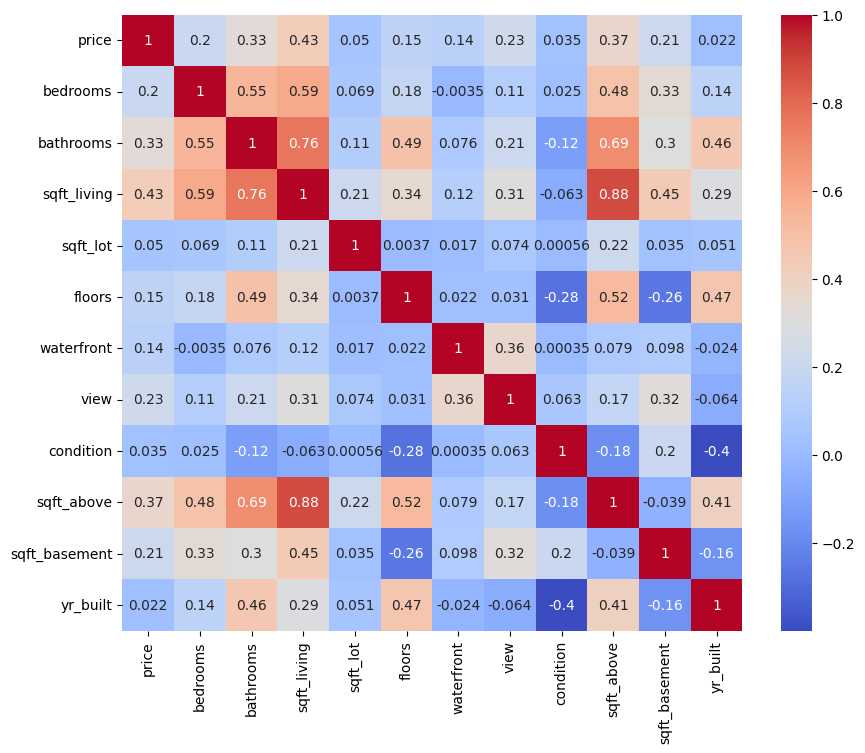

In [31]:
df_corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.title=('correlation matrix')
plt.show()

In [32]:
import scipy.stats as stats

In [33]:
z_score = stats.zscore(df)
threshold = 3
print("Before removing outliers",df.shape)
outliers_df = df[(z_score>threshold).any(axis=1)]
df = df[(z_score<=threshold).all(axis=1)]
print("size after removing outliers:",df.shape)
outliers_df.head()

Before removing outliers (4600, 12)
size after removing outliers: (4244, 12)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921
56,491500.0,4,1.75,2190,125452,1.0,0,2,3,2190,0,1968
100,736500.0,4,2.50,3180,21904,2.0,0,3,3,3180,0,2000
107,1090000.0,4,2.50,4340,141570,2.5,0,0,3,4340,0,1992
118,1030000.0,5,2.75,3190,16920,1.0,0,3,3,1690,1500,1976


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(scaler.transform(df),columns=df.columns)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [46]:
x=df.drop("price",axis=1)
y=df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 42)
print(f"'xtrain shape:'{x_train.shape}")
print(f"'xtest shape:'{x_test.shape}")

'xtrain shape:'(3183, 11)
'xtest shape:'(1061, 11)


In [51]:
models =[
('regression',RandomForestRegressor()),
('LinearRegression',LinearRegression()),
('decisiontree',DecisionTreeRegressor()),
('knn',KNeighborsRegressor())
]

In [52]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [54]:
for name, model in models:
    print(name)
    print()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("mean_squared_error:",mean_squared_error(y_test,y_pred))
    print("\n")
    print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))
    print("\n")
    print("R-squarred(R2):",r2_score(y_test,y_pred))
    print("\n")
    

regression

mean_squared_error: 43796792745.95354


mean_absolute_error: 140457.8393163274


R-squarred(R2): 0.4127818426135338


LinearRegression

mean_squared_error: 41194072741.01168


mean_absolute_error: 139590.95600721808


R-squarred(R2): 0.44767856334740674


decisiontree

mean_squared_error: 73718204503.27554


mean_absolute_error: 186344.9310868049


R-squarred(R2): 0.011601866251914617


knn

mean_squared_error: 54270710864.461784


mean_absolute_error: 155957.74907360977


R-squarred(R2): 0.27234975814918927


